In [1]:
import dlib
import cv2 as cv
import matplotlib.pyplot as plt
detector = dlib.get_frontal_face_detector()
img = cv.imread("./img/man_2.jpg")
img = cv.resize(img,(0,0), fx=2, fy=2)
img_copy = img.copy()
img_copy_1 = img.copy()
img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
face_rects, scores, idx = detector.run(img, 0)
for face in face_rects:
    # 取得左上角的座標、右下角座標
    x1 = face.left()
    y1 = face.top()
    x2 = face.right()
    y2 = face.bottom()
    
    # 畫出來
    cv.rectangle(img_copy, (x1, y1), (x2, y2), (0,255, 0), 4,cv.LINE_AA)
    # 印出來

cv.imshow("img",img_copy)
cv.waitKey(0)

-1

In [2]:
faceLong = y2-y1
upface = img_copy_1[y1:y1+int(1/3*faceLong),x1:x2]
downface = img_copy_1[y1+int(1/3*faceLong):y2,x1:x2]
cv.imshow("upface",upface)
cv.imshow("downface",downface)
cv.waitKey(0)

-1

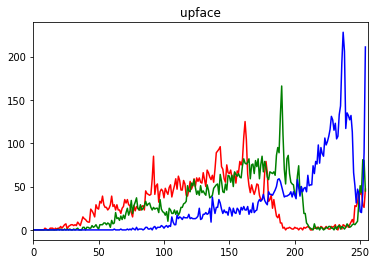

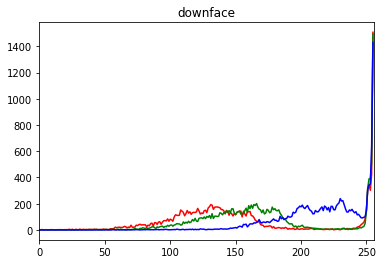

In [6]:
color = ("r", "g", "b")

for i in range(len(color)):
    histr = cv.calcHist([upface], [i], None, [255], [0, 256])
    plt.plot(histr, color = color[i])
    plt.xlim([0,256])
plt.title("upface")
plt.show()

for i in range(len(color)):
    histr = cv.calcHist([downface], [i], None, [256], [0, 256])
    plt.plot(histr, color = color[i])
    plt.xlim([0,256])
plt.title("downface")
plt.show()


In [8]:
hist1 = cv.calcHist([upface], [0, 1, 2], None, [64, 64,64], [0, 256, 0, 256,0, 256])
cv.normalize(hist1, hist1, 0, 1.0, cv.NORM_MINMAX)
hist2 = cv.calcHist([downface], [0,1,2], None, [64,64,64], [0, 256, 0, 256,0, 256])
cv.normalize(hist2, hist2, 0, 1.0, cv.NORM_MINMAX)
near = cv.compareHist(hist1,hist2,0)
print(near)


0.36237414786857414
